In [3]:
%load_ext dotenv
%dotenv
import os

SN_API_HOST = os.getenv('SN_API_HOST')
SN_API_KEY = os.getenv('SN_API_KEY')

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [4]:
from signals_notebook.api import SignalsNotebookApi
SignalsNotebookApi.init(SN_API_HOST, SN_API_KEY)

In [5]:
from signals_notebook.materials import Library, MaterialStore
from signals_notebook.common_types import MID, ChemicalDrawingFormat
from signals_notebook.exceptions import SignalsNotebookError

In [6]:
libraries = Library.get_list()
libraries_dict = {}
for lib in libraries:
    libraries_dict[lib.name] = lib
    print(lib.eid, lib.name)

assetType:6172be4052faff0007501162 Reagents (SNB)
assetType:6172be4052faff000750119c Cell Lines
assetType:6172be4052faff0007501181 Plasmids
assetType:6172be4052faff0007501154 Compounds
assetType:6172be4052faff00075011b1 Primers
assetType:6172be4052faff0007501193 Equipment
assetType:6172be4052faff00075011c3 Antibodies
assetType:619656d40669900007d69414 Units
assetType:61a762b80669900007d6ab50 Lab animal
assetType:61e9451ac8bce24516f8f90c Lab animal 1
assetType:61faa3e76ed5f16677f438af Indicators
assetType:61fbb713587d0c711fdd7e03 Brain sections
assetType:620580c6587d0c711fdd84e9 Solvents for optical investigations
assetType:620b971e9a486b3ddae61f4f Culture medias
assetType:620dddad587d0c711fdd8862 Compound for OLED cell
assetType:621701e99a486b3ddae63bc0 Brain photo
assetType:625436287e0e8f57cc5cd892 DNAMaterials


In [7]:
primer_lib = MaterialStore.get(MID('assetType:6172be4052faff00075011b1'))

In [8]:
asset = MaterialStore.get(MID('asset:618d2ff60669900007d68718'))

In [9]:
list(asset.get_batches())

[Batch(asset_type_id='6172be4052faff00075011c3', eid='batch:618d2ff70669900007d68719', library_name='Antibodies', digest='56506129', name=' 0001- 0001', created_at=datetime.datetime(2021, 11, 11, 15, 0, 8, 24000, tzinfo=datetime.timezone.utc), edited_at=datetime.datetime(2021, 11, 11, 15, 0, 8, 24000, tzinfo=datetime.timezone.utc), fields={'Description': MaterialField(value=''), 'Expiration Date': MaterialField(value='2021-12-30T21:00Z'), 'Name': MaterialField(value=' 0001- 0001'), 'Storage Temperature': MaterialField(value='-20 °C'), 'Submission Date': MaterialField(value='2021-11-11T15:00:08.024Z'), 'Submitter': MaterialField(value=User(user_id='108', user_name='lyudmila.levenets@quantori.com', email='lyudmila.levenets@quantori.com', first_name='Lyudmila', last_name='Levenets', picture=Picture(link='/api/v1.0/profiles/108/picture/cc71710a7a8914dc35cce4c7e7720cf5'), is_enabled=True)), 'Working Dilution': MaterialField(value='150 mg/mL')}, type=<MaterialType.BATCH: 'batch'>)]

In [10]:
asset.library

Library(asset_type_id='6172be4052faff00075011c3', eid='assetType:6172be4052faff00075011c3', library_name='Antibodies', digest='47354405', name='Antibodies', created_at=datetime.datetime(2021, 10, 22, 13, 36, 0, 479000, tzinfo=datetime.timezone.utc), edited_at=datetime.datetime(2022, 4, 9, 12, 8, 50, 561000, tzinfo=datetime.timezone.utc), fields={'Description': MaterialField(value=''), 'Material Library Type': MaterialField(value='Antibodies'), 'Name': MaterialField(value='Antibodies')}, type=<MaterialType.LIBRARY: 'assetType'>)

In [11]:
batch = MaterialStore.get(MID('batch:618d2ff70669900007d68719'))


In [12]:
batch.library


Library(asset_type_id='6172be4052faff00075011c3', eid='assetType:6172be4052faff00075011c3', library_name='Antibodies', digest='47354405', name='Antibodies', created_at=datetime.datetime(2021, 10, 22, 13, 36, 0, 479000, tzinfo=datetime.timezone.utc), edited_at=datetime.datetime(2022, 4, 9, 12, 8, 50, 561000, tzinfo=datetime.timezone.utc), fields={'Description': MaterialField(value=''), 'Material Library Type': MaterialField(value='Antibodies'), 'Name': MaterialField(value='Antibodies')}, type=<MaterialType.LIBRARY: 'assetType'>)

In [13]:
primer_lib.get_asset('PKI-000022')

Asset(asset_type_id='6172be4052faff00075011b1', eid='asset:6202d73d9a486b3ddae616a7', library_name='Primers', digest='56300536', name='PKI-000022', created_at=datetime.datetime(2022, 2, 8, 20, 49, 1, 985000, tzinfo=datetime.timezone.utc), edited_at=datetime.datetime(2022, 2, 8, 20, 49, 1, 985000, tzinfo=datetime.timezone.utc), fields={'Description': MaterialField(value=''), 'Forward or Reverse Primer': MaterialField(value='Forward'), 'Intended Use': MaterialField(value='For testing purpose only'), 'Material Library Type': MaterialField(value='Primers'), 'Melting Temperature': MaterialField(value='57.7'), 'Name': MaterialField(value='PKI-000022'), 'Primer Name': MaterialField(value='New test primer'), 'Target Sequence': MaterialField(value='CGTGGGTCTCTCGCGGTATCATTGCAGCACTGAAAAAAAAAACTGGGGCCAGATGGGTAAGCCCTCCCCCCGGCGACGGCGGAGTCAGGCTGATGATGATTTTTTTAAGAACTCTGTAGCACCGCC')}, type=<MaterialType.ASSET: 'asset'>)

In [14]:
primer_lib.get_asset_batches('PKI-000013')

[Batch(asset_type_id='6172be4052faff00075011b1', eid='batch:61e9827408ab291334b232d4', library_name='Primers', digest='43394085', name='PKI-000013-0001', created_at=datetime.datetime(2022, 1, 20, 15, 40, 36, 583000, tzinfo=datetime.timezone.utc), edited_at=datetime.datetime(2022, 1, 20, 15, 40, 36, 583000, tzinfo=datetime.timezone.utc), fields={'Description': MaterialField(value=''), 'Name': MaterialField(value='PKI-000013-0001'), 'Submission Date': MaterialField(value='2022-01-20T15:40:36.583Z'), 'Submitter': MaterialField(value=User(user_id='103', user_name='sergey.kuznetsov@quantori.com', email='sergey.kuznetsov@quantori.com', first_name='Sergey', last_name='Kuznetsov', picture=Picture(link='/api/v1.0/profiles/103/picture/3b22f037b2c50fcd84a959f48d48c45e'), is_enabled=True))}, type=<MaterialType.BATCH: 'batch'>)]

In [15]:
primer_lib.get_batch('PKI-000001-0001')

Batch(asset_type_id='6172be4052faff00075011b1', eid='batch:61a63aed0669900007d6a0fd', library_name='Primers', digest='84236581', name='PKI-000001-0001', created_at=datetime.datetime(2021, 11, 30, 14, 53, 33, 441000, tzinfo=datetime.timezone.utc), edited_at=datetime.datetime(2021, 12, 1, 16, 10, 53, 701000, tzinfo=datetime.timezone.utc), fields={'Buffer': MaterialField(value='TE'), 'Description': MaterialField(value=''), 'Name': MaterialField(value='PKI-000001-0001'), 'Purified': MaterialField(value='True'), 'Submission Date': MaterialField(value='2021-11-30T14:53:33.441Z'), 'Submitter': MaterialField(value=User(user_id='115', user_name='vladislav.kuznetsov@quantori.com', email='vladislav.kuznetsov@quantori.com', first_name='Vlad', last_name='Kuznetsov', picture=Picture(link=None), is_enabled=True))}, type=<MaterialType.BATCH: 'batch'>)

# Get drawing

(E)-N-(5-(2-(2-(3-chloro-5-ethoxy-4-((2-fluorobenzyl)oxy)benzylidene)hydrazineyl)-2-oxoethyl)-1,3,4-thiadiazol-2-yl)benzamide


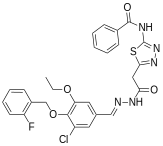

In [16]:
from IPython.display import SVG

compound_lib = libraries_dict['Compounds']
compound_asset = compound_lib.get_asset('CPD-000020')
print(compound_asset['Chemical Name'])
svg_file = compound_asset.get_chemical_drawing(ChemicalDrawingFormat.SVG)
SVG(data=svg_file.content)

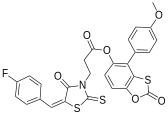

In [17]:
compound_batch = compound_lib.get_batch('CPD-000006-0001')
svg_file = compound_batch.get_chemical_drawing(ChemicalDrawingFormat.SVG)
SVG(data=svg_file.content)

In [18]:
primer_asset = primer_lib.get_asset('PKI-000022')
try:
    primer_asset.get_chemical_drawing(ChemicalDrawingFormat.SVG)
except SignalsNotebookError as e:
    print(e)

<SignalsNotebookError status=400 code=BadRequest> title=The request parameters are in bad format. detail=The API does not support to get Chemical Drawing from PRIMERS material library.>


My chemical ball reagent (SK)


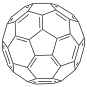

In [19]:
reagents_lib = libraries_dict['Reagents (SNB)']
reagent_asset = reagents_lib.get_asset(' 0003')  # try ' 0003', beautiful rendering
print(reagent_asset['Chemical Name'])
svg_file = reagent_asset.get_chemical_drawing(ChemicalDrawingFormat.SVG)
SVG(data=svg_file.content)

# Get image

0001%2C.jpg


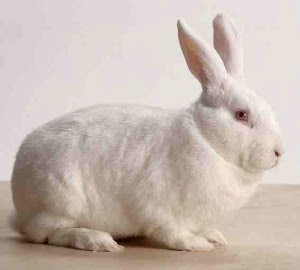

In [20]:
from IPython.display import Image
animal_lib = libraries_dict['Lab animal']
animal_asset = animal_lib.get_asset('0001,')
image_file = animal_asset.get_image()
print(image_file.name)
Image(image_file.content)

PKI-000001.png


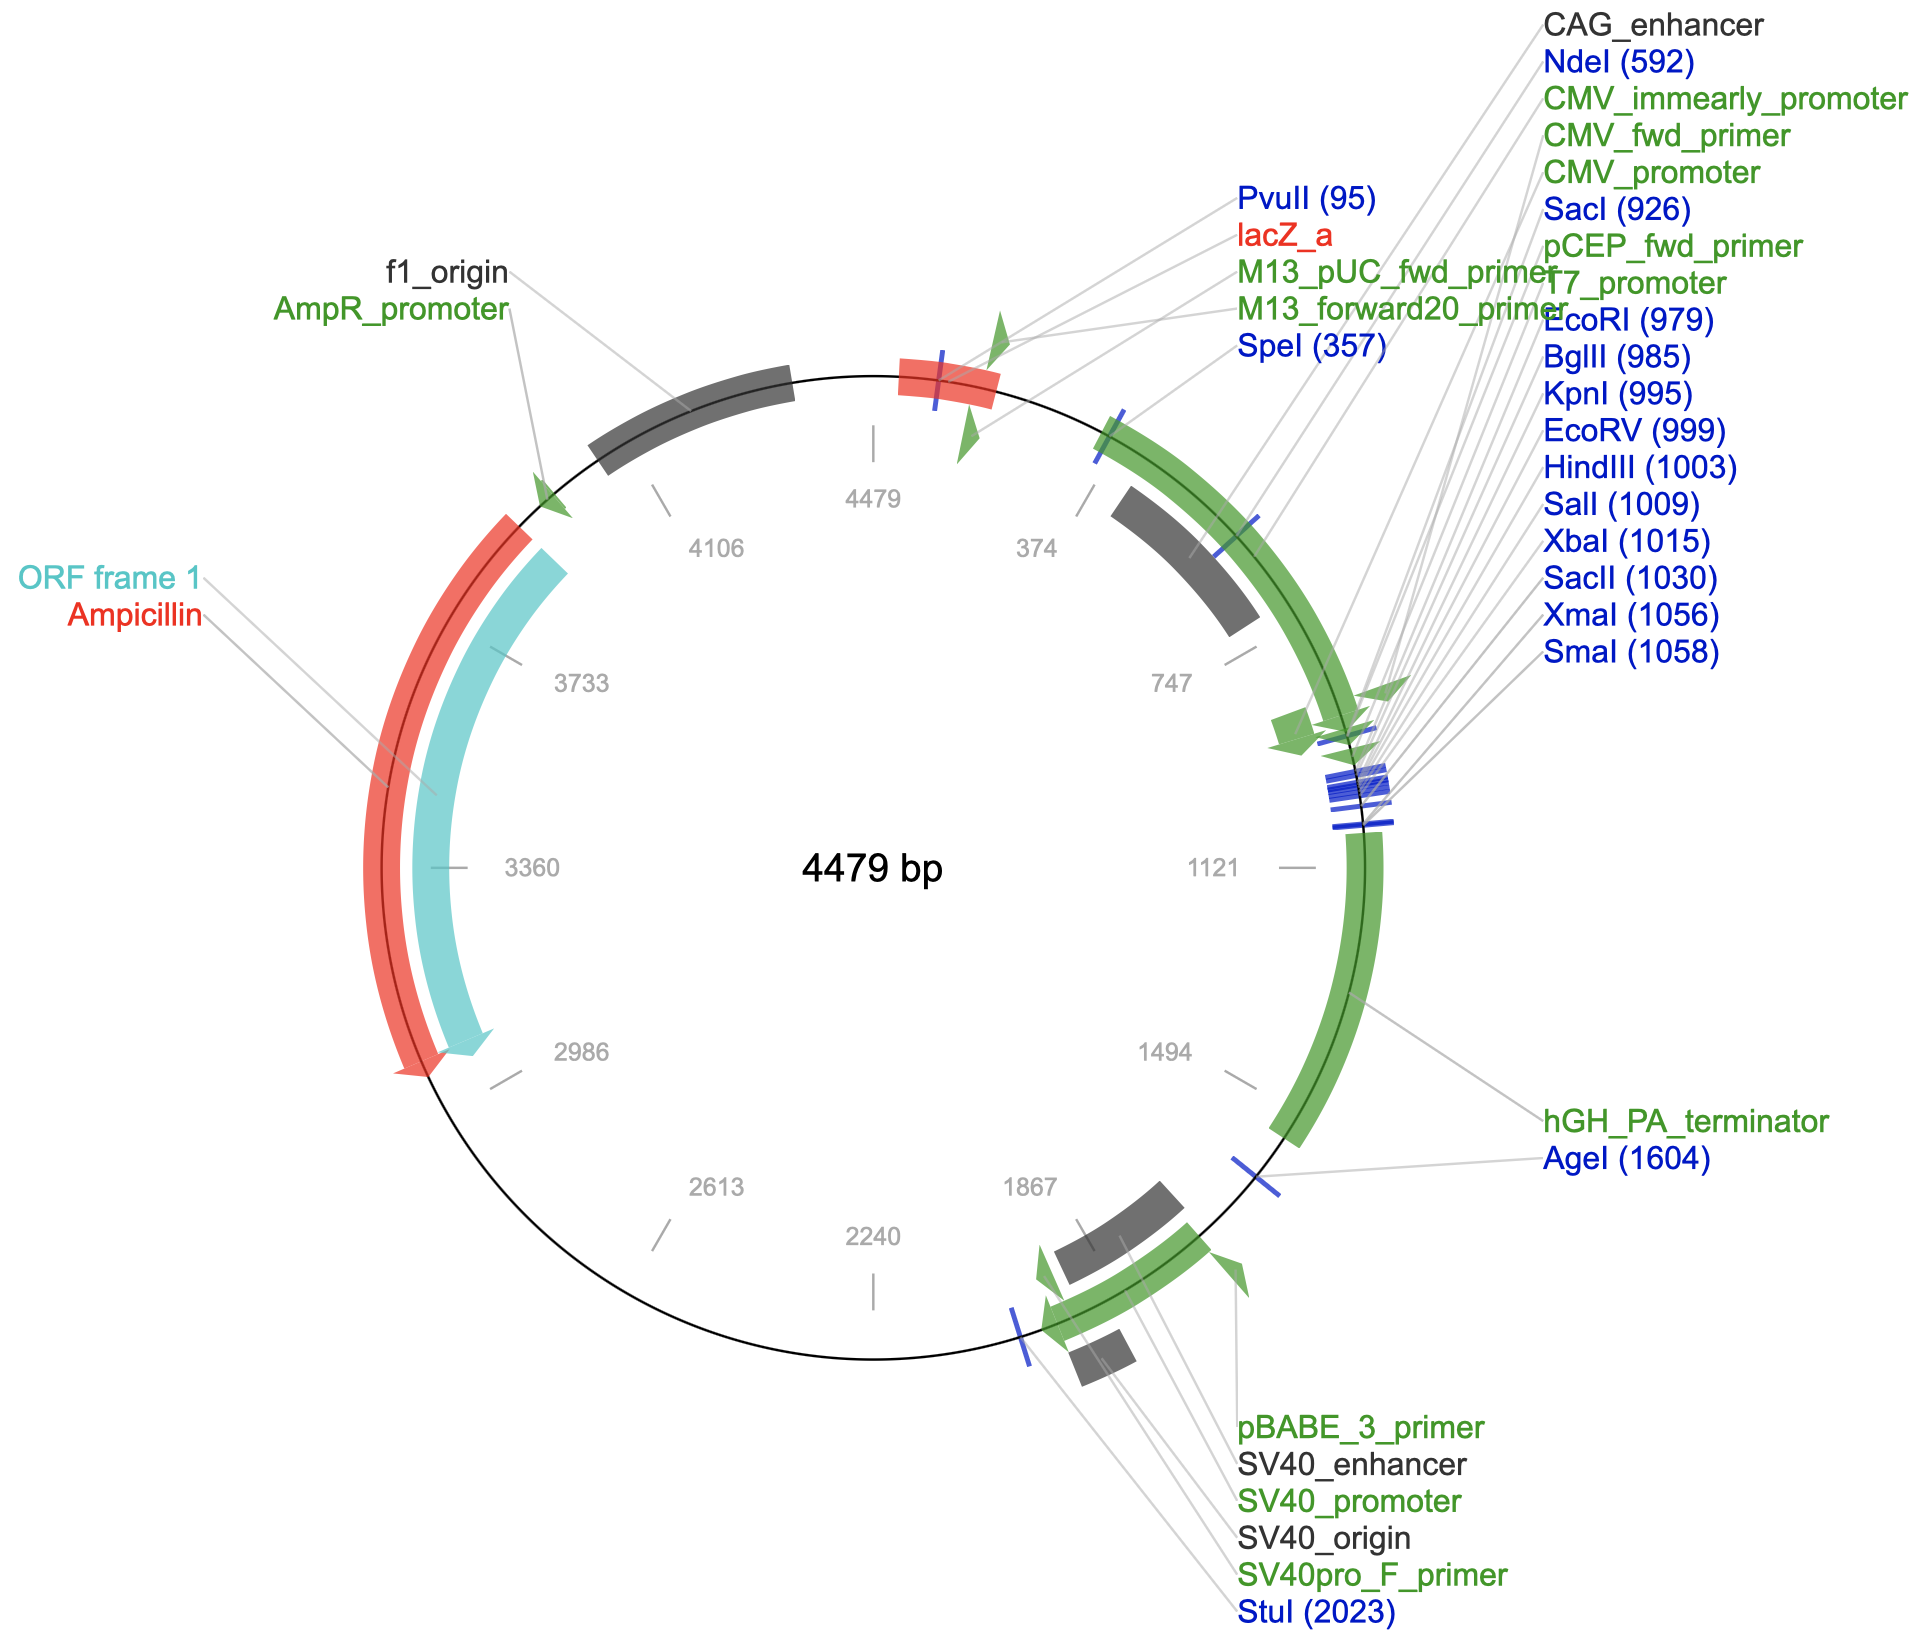

In [21]:
plasmids_lib = libraries_dict['Plasmids']
plasmid_asset = plasmids_lib.get_asset('PKI-000001')
image_file = plasmid_asset.get_image()
print(image_file.name)
Image(image_file.content)

EQ-000017-0001.png


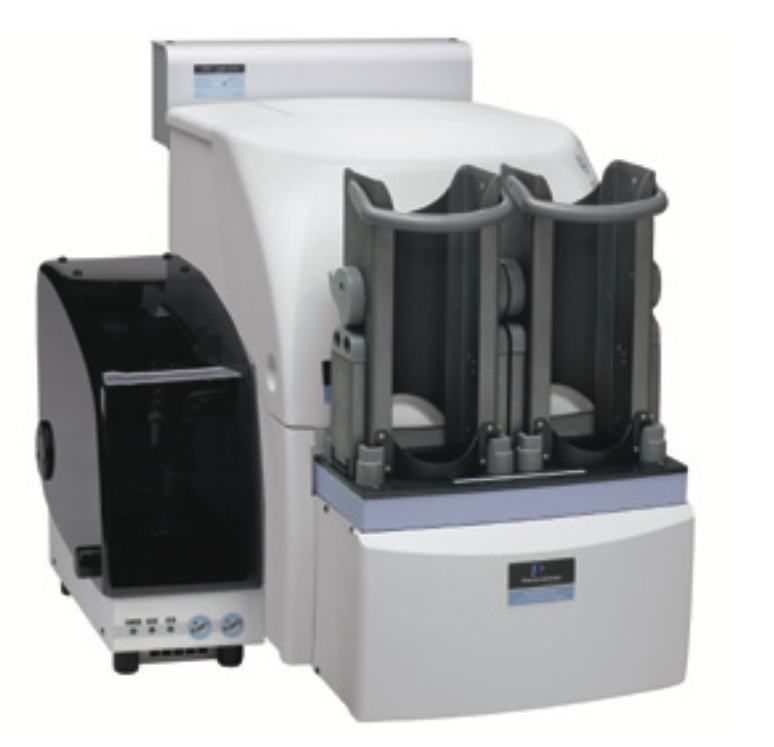

In [22]:
equipment_lib = libraries_dict['Equipment']
equipment_batch = equipment_lib.get_batch('EQ-000017-0001')
image_file = equipment_batch.get_image()
print(image_file.name)
Image(image_file.content)

# Get bio sequence


In [23]:
dna_lib = libraries_dict['DNAMaterials']
dna_asset = dna_lib.get_asset('DNAM-0001')
sequence_file = dna_asset.get_bio_sequence()
print(sequence_file.content.decode('utf-8'))

LOCUS       Chimeric_DNA_tail_only   10000 bp  DNA     circular BCT 08-Dec-2021
KEYWORDS    Chimeric_DNA_tail_only
SOURCE      Synthetic organism
  ORGANISM  Synthetic organism
FEATURES             Location/Qualifiers
     misc_feature    12..180
                     /label="Misc Test feature 1"
     misc_feature    200..300
                     /label="Misc Test feature 2"
     misc_feature    480..1500
                     /label="Misc Test feature 2"
     misc_feature    complement(12..86)
                     /label="Reverse direction"
                     /direction="LEFT"
                     /gene="Chimera"
                     /translation="MILNNFCFRDLKYTFRKGIWDAFPDKSQKWYHIGEFQGVHYIGFFQEHT"
     primer_bind     25..78
                     /label="primer 1"
ORIGIN
        1 CTACGTACAG AGCCCAGTAC TCTACAGGTT TAACTAGGAG AAGATCTGAC AGTCGGAGGG
       61 TTCGCCCCAG CCTCATCGGC ATTTAGACGT GGGGGAGTAT CGATCGCGTG CAAGATAAGG
      121 GTCATAACAA AACACTGCGA ACAGCGCCGC CGATCAGGCA AGTTAGCGCC C

# Update material properties


In [24]:
units_lib = libraries_dict['Units']
asset = units_lib.get_asset('UNT-0002')
asset['Custom Field 1 (SK)']

{'eid': 'chemicalDrawing:2fc7a20f-e74c-4142-b4fa-cfa2fab41c58',
 'name': 'ChemDraw Document',
 'type': 'chemicalDrawing'}

In [27]:
from signals_notebook.common_types import File
from signals_notebook.entities import EntityStore

chemDraw = EntityStore.get('chemicalDrawing:2fc7a20f-e74c-4142-b4fa-cfa2fab41c58')

file = File.read('/Users/evgeniy.pokidov/Pictures/quantori.png')
asset['Unit Name'] = 'Updated from SDK'
asset['Units Image'] = file
asset['Custom Field 1 (SK)'] = chemDraw
asset.save()

AttributeError: type object 'File' has no attribute 'read'